--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Mengxi Wang](https://github.com/Mengxi-20)

# Replication of Chen, T., Kung, J. K. S., & Ma, C. (2020) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Chen, T., Kung, J. K. S., & Ma, C. (2020). Long Live Keju! The Persistent Effects of China’s Civil Examination System. The Economic Journal, 130(631), 2030–2064. 

##### Downloading and viewing this notebook:


* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-Mengxi-20). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-Mengxi-20) on GitHub).

* The original paper, as well as the data and code provided by the authors can be accessed [here](https://academic.oup.com/ej/article/130/631/2030/5819954).


##### Information about replication and individual contributions:

* 

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Identification" data-toc-modified-id="2.-Identification-2">2. Identification</a></span></li><li><span><a href="#3.-Empirical-Setup" data-toc-modified-id="3.-Empirical-Setup-3">3. Empirical Setup</a></span></li><li><span><a href="#4.-Replication-of-Chen-et-al.-(2020)" data-toc-modified-id="4.-Replication-of-Chen-et-al.-(2020)-4">4. Replication of Chen et al. (2020)</a></span><ul class="toc-item"><li><span><a href="#4.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="4.1.-Data-&amp;-Descriptive-Statistics-4.1">4.1. Data &amp; Descriptive Statistics</a></span></li><li><span><a href="#4.2.-Results" data-toc-modified-id="4.2.-Results-4.2">4.2. Results</a></span><ul class="toc-item"><li><span><a href="#4.2.1.-Tests-of-the-Validity-of-the-RD-Approach" data-toc-modified-id="4.2.1.-Tests-of-the-Validity-of-the-RD-Approach-4.2.1">4.2.1. Tests of the Validity of the RD Approach</a></span></li><li><span><a href="#i.--Extension:-Visual-Validity-Check" data-toc-modified-id="i.--Extension:-Visual-Validity-Check-4.2.2">i.  Extension: Visual Validity Check</a></span></li><li><span><a href="#ii.-Advanced-Validity-Check" data-toc-modified-id="ii.-Advanced-Validity-Check-4.2.3">ii. Advanced Validity Check</a></span></li><li><span><a href="#4.2.2.-First-Year-GPAs-and-Academic-Probation" data-toc-modified-id="4.2.2.-First-Year-GPAs-and-Academic-Probation-4.2.4">4.2.2. First Year GPAs and Academic Probation</a></span></li><li><span><a href="#4.2.3.-The-Immediate-Response-to-Academic-Probation" data-toc-modified-id="4.2.3.-The-Immediate-Response-to-Academic-Probation-5.2.5">4.2.3. The Immediate Response to Academic Probation</a></span></li><li><span><a href="#4.2.4.-The-Impact-onSubsequent-Performance" data-toc-modified-id="4.2.4.-The-Impact-onSubsequent-Performance-4.2.6">4.2.4. The Impact onSubsequent Performance</a></span></li><li><span><a href="#i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term" data-toc-modified-id="i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term-4.2.7">i. Main Results for Impact on GPA &amp; Probability of Placing Above Cutoff in the Next Term</a></span></li><li><span><a href="#ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)" data-toc-modified-id="ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)-4.2.8">ii. Formal Bound Analysis on Subsequent GPA (partial extension)</a></span></li><li><span><a href="#4.2.5.-The-Impacts-on-Graduation" data-toc-modified-id="4.2.5.-The-Impacts-on-Graduation-4.2.9">4.2.5. The Impacts on Graduation</a></span></li></ul></li></ul></li><li><span><a href="#6.-Extension:-Robustness-Checks" data-toc-modified-id="5.-Extension:-Robustness-Checks-5">5. Extension: Robustness Checks</a></span><ul class="toc-item"><li><span><a href="#5.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="5.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-5.1">5.1.  A Closer Look at Students' Subsequent Performance.</a></span><ul class="toc-item"><li><span><a href="#5.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2" data-toc-modified-id="5.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2-5.1.1">5.1.1. Subsequent Performance and Total Credits in Year 2</a></span></li><li><span><a href="#5.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)" data-toc-modified-id="5.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)-5.1.2">5.1.2. Subsequent Cumulative Grade Point Average (CGPA)</a></span></li></ul></li><li><span><a href="#5.2.-Bandwidth-Sensitivity" data-toc-modified-id="5.2.-Bandwidth-Sensitivity-5.2">5.2. Bandwidth Sensitivity</a></span></li></ul></li><li><span><a href="#6.-Conclusion" data-toc-modified-id="6.-Conclusion-6">6. Conclusion</a></span></li><li><span><a href="#7.-References" data-toc-modified-id="7.-References-7">7. References</a></span></li></ul></div>

In [33]:
%matplotlib inline
!pip install linearmodels
!pip install graphviz
!pip install stargazer
import sys
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm_api

In [34]:
from linearmodels.iv import IV2SLS
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE, PanelOLS
from IPython.display import HTML, Image
from prettytable import PrettyTable
from stargazer.stargazer import Stargazer
from statsmodels.iolib.summary2 import summary_col
from linearmodels.panel import compare

---
# 1. Introduction 
---

Chen et. al. (2020) examine the effects of China’s civil examination system (keju), a long-lived institution, on human capital outcome todays. Becoming dominant from Song dynasty (c. 960–1276), Keju is the earliest elite selection system in the world, which aims to recruit talents to serve in the bureaucracy. Since Jinshi is the highest honor and qualification in this civil exam, passing the highest level of the exam and receiving the honor of Jinshi mean generous pecuniary rewards and a promising future. Over time, the civil examination system formed a distinct group of local elites with deep respect for learning and academic achievements. This cultural characteristic still existed for a long time even after the abolition of the imperial examination system.

To verify the causal relationship between keju and contemporary human capital outcome, Chen et. al. (2020) introduce an **instrumental variable (IV)** - Distance to the Printing Ingredients (Pine and Bamboo) to tackle the issues of omitted variables bias. The IV is motivated by the idea that to become a winner in the Keju exam, apart from the limited textbooks, the candidates still need a large cluster of reference books, which explain nuances of texts and teach tricks of writing essay. That is why printing ingredients play such an important role in the Keju exam. At the end, Chen et. al. (2020) present the causality and compare OLS and TSLS using different control variables.

This notebook is structured as follows: In the next section the identification strategy is analyzed, then the empirical strategy that the authors use for estimation is briefly discussed. The fourth section and the fifth section, as the core of this notebook, show the replication of main results in the paper and try to solve possible problems with weak instruments, xxx and xxx. The sixth section offers some concluding remarks.

---
# 2. Identification
---

Chen et. al. (2020) in their paper aim to verify whether the relationship between Keju and contemporary human capital outcome is causal. However, performance i.e. Jinshi density of various prefectures may be related to many complicated factors. So the estimates of contemporary human capital outcomes to Keju are likely to suffer from omitted variable — variables that are simultaneously associated with both historical jinshi density and years of schooling today. Unobserved factors, like natural or genetic endowments, may be associated with prefectures that had produced more jinshi. Natural or genetic endowments are hard to measure and therefore it is not possible to control for them, when estimating the contemporary human capital outcomes to Keju. Thus, an omitted variable bias might occur. 

Chen’s approach to avoid bias is now to employ an instrumental variable approach which is based on the accuracy of the causal graph below.

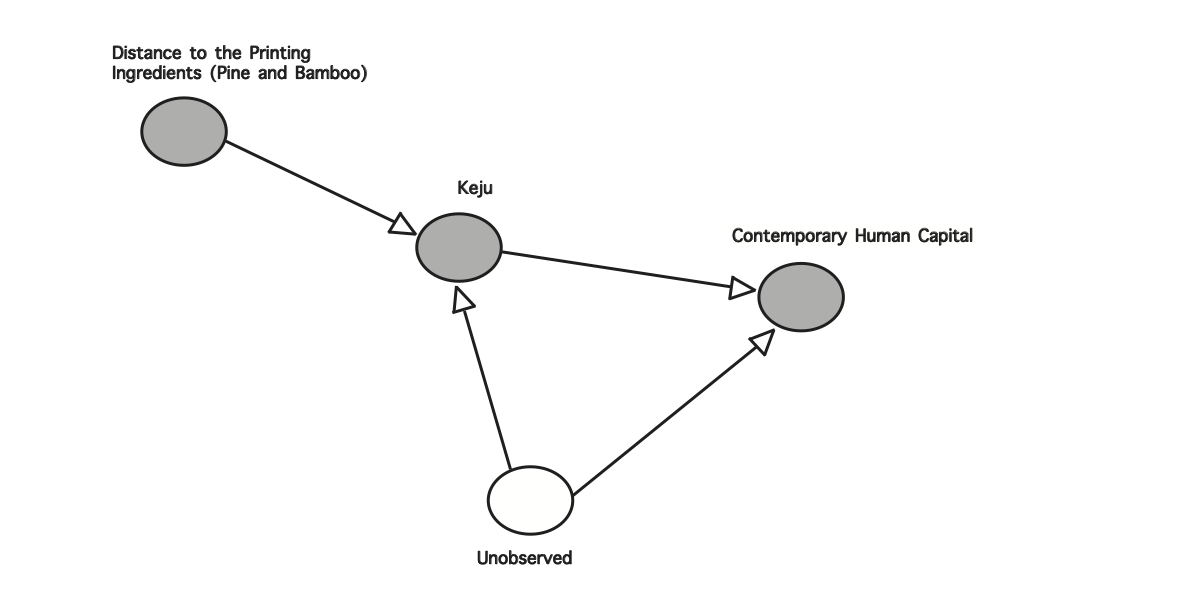

In [35]:
Image("/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/files/causal graph.png")

Chen et. al. (2020) examine the effects of China’s civil examination system using data from the Ming-Qing period (c. 1368–1905). In such a context, the printing technology in China relied mainly on pine and bamboo for producing ink and paper. Typically, the printing centers were located near to the pine and bamboo habitats to reduce the transport costs. Besides, for geographical reasons, the transportation of raw materials i.e. pine and bamboo products was mostly finished via waterways. 

Therefore, an instrumental variable is constructed using a prefecture’s shortest river distance to its nearest sites of pine and bamboo — the two key ingredients required for producing ink and paper in woodblock printing. The following is the logic that why this instrumental variable is feasible and reasonable. 

* To some extent, the performance of various Chinese prefectures in the Keju exam is closely related to the convenience of printing and obtaining books, not only textbooks but also reference books. 

* The main printing centers were located in close to the producing areas of pine and bamboo. 

* The raw materials needed for printing were mainly transported by water via the main river branches. 

Since the geographic distributions of pine and bamboo forests are random, the exogeneity assumption of the instrumental variable holds. 

If instead of a prefecture’s shortest river distance to its nearest sites of pine and bamboo, the shortest distance to printing centers is directly employed as the instrumental variable, there might be problems of exclusion restriction, because the locations of printing centers were not exogenously determined. For example, they were more likely to be located in economically prosperous and densely populated areas. 


---
# 3. Empirical Setup
---

The authors examined the impact of keju on contemporary human capital outcomes. For the regression analysis Chen et. al. (2020) employ the following model to do the estimation:

\begin{equation}
y_{i} = \beta keju_{i} + \gamma_{1} X^{c}_{i} + \gamma_{2} X^{h}_{i} + \alpha_{p} + \epsilon_{i},
\end{equation}


* $i$ indexes a prefecture,
* $y_{i}$ stands for the contemporary human capital measure constructed from the 2010 population census,
* $\alpha_{p}$ denotes province fixed effects,
* $\epsilon_{i}$ is the error term,
* $keju_{i}$ is a measure of the degree of success in civil exams of prefecture i in the Ming and Qing dynasties, specifically measured by the total number of candidates who obtained the jinshi degree in the keju exam in that prefecture during the entire Ming-Qing period (c. 1371–1905),
* $X^{c}_{i}$ denotes a vector of baseline control variables, which are likely to impact upon the years of schooling today, including night-time lights and key features of geography,
* $X^{h}_{i}$ denotes a vector of historical variables, which are likely correlated with jinshi density while also bearing upon contemporary human capital outcomes, including historical economic prosperity and regional migration.

Key variables in the data sets:


In [36]:
file_path = '/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/files/Abb_1.txt'
with open(file_path) as file_abb_1:
    data = file_abb_1.read()
print(data)

lneduyear       Average years of schooling (logged)
lnjinshipop     Jinshi density (logged)
lnnspop         Share of population with no education (×100, logged)
lnmppop         Share of population with elementary and secondary school education (×100, logged)
lnhighpop       Share of population with high school education (×100, logged)
lnunipop        Share of population with university and above (×100, logged)
lnnightlight    Night-time lights in 2010 (logged)
lncoastdist     Distance to coast (1,000 km, logged)
tri             Terrain ruggedness
suitability     Agricultural suitability
lnpopdensity    Population density (logged)
urbanrates      Urbanisation rates
provid          Province fixed effects


---
# 4. Replication of Ting Chen, James Kai-sing Kung and Chicheng Ma (2020)
---

## 4.1. Data & Descriptive Statistics


To obtain the data of key explanatory variable — $keju_{i}$, Chen et. al. (2020) filtered data from Official Directory of Ming-Qing Civil Exam Graduates. After sorting out the jinshi degrees obtained in the 242 civil exams that took place between 1371 and 1904, the authors normalized the number of jinshi by the prefecture population (in units of 10,000).

Furthermore, in order to reduce skewness, they raised the number of jinshi density to the natural log. At the end, the authors add 1 to the number of jinshi, i.e., ln(1 + jinshi/population), in case of losing observations with a value of zero. The processed data named jinshi density are used to measure the historical success in China’s civil exam (Keju).

Besides, the data of dependent variable — $y_{i}$, come from the 2010 Chinese Family Panel Survey (CFPS). “Average years of schooling" in the census was selected and raised to the natural log to measure the contemporary human capital. 

As for control variables $X^{c}_{i}$ and $X^{h}_{i}$ , they are constructed as follows. 

The vector of baseline control variables — $X^{c}_{i}$:

| Baseline controls | Construction | Comments | 
| :--- | :--- | :--- |
| Night-time lights | the average satellite light density at night time in 2010 at the prefectural level | Measuring the contemporary economic prosperity | 
| geography 1: distance to coast | the distance between a prefecture’s centroid to the closest point on the coast | prefectures located on the coast were likely early beneficiaries of Western technology, knowledge and trade | 
| geography 2: terrain ruggedness | the difference in elevation between adjacent cell grids using data provided by the United States Geographic Service (USGS) | terrain ruggedness can have a profoundly lasting effect on long-term economic development either through its direct impact or through its interaction with key historical events | 


The vector of historical variables — $X^{h}_{i}$:

| Historical controls | Construction | Comments | 
| :--- | :--- | :--- |
| historical economic prosperity 1: population density | the average population density between 1393 and 1910 | / | 
| historical economic prosperity 2: urbanisation | the average share of the urban population between 1393 and 1920 | / | 
| historical economic prosperity 3: agricultural suitability | yields of crops suitable for cultivation after 1500 based on the Caloric Suitability Indices (Galor and Ozak, 2016) | China was still predominantly an agricultural economy in the Ming-Qing period. | 
| Regional migration | the 1,370 jinshi (2.65%) whose birthplace was different from the place of examination are excluded from the analysis | migration may affect development if prefectures with a proven track record in civil exams attracted candidates to migrate to these places. | 



The following table shows the descriptive statistics of jinshi density, 

In [37]:
data = pd.read_csv('/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/data/census20_final.csv')
data = pd.DataFrame(data)

In [38]:
pd.__version__

'1.3.0'

In [39]:
data.describe()

,provid,prefid,year,lneduyear,lnjinshipop,lnjinshipopm,lnnspop,lnmppop,lnhighpop,lnunipop,...,noise491,noise492,noise493,noise494,noise495,noise496,noise497,noise498,noise499,noise500
count,274.000000,274.000000,274.0,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,40.572993,406766.058394,2010.0,2.160471,0.917486,0.678223,1.639050,4.267677,2.593947,0.878129,...,0.263004,0.229871,-0.231798,-0.181745,-0.350418,0.114853,0.164522,0.209750,-0.287392,-0.273478
std,13.293674,133168.485563,0.0,0.118061,0.701236,0.336513,0.587474,0.106720,0.315687,0.653332,...,1.072196,1.159484,1.056623,1.113320,1.070050,0.947882,1.083819,1.105535,1.117204,0.995672
min,11.000000,110000.000000,2010.0,1.726332,0.000000,0.000000,-0.301293,3.763713,1.645886,-0.954173,...,-2.195120,-2.721890,-2.684260,-3.502790,-3.541180,-2.488020,-3.818790,-3.018940,-3.508020,-2.567170
25%,34.000000,341025.000000,2010.0,2.101998,0.524176,0.459289,1.269270,4.231547,2.421398,0.451184,...,-0.447079,-0.550032,-0.924010,-0.919192,-1.053015,-0.422918,-0.601708,-0.482121,-1.119657,-0.970280
50%,42.000000,420750.000000,2010.0,2.169625,0.788603,0.666419,1.603957,4.291116,2.621166,0.780451,...,0.215151,0.215907,-0.213439,-0.108272,-0.405871,0.110385,0.252128,0.312521,-0.278752,-0.469215
75%,51.000000,510975.000000,2010.0,2.230820,1.054229,0.902600,2.007281,4.336313,2.818989,1.128656,...,0.970237,1.021440,0.454197,0.496199,0.368648,0.650588,1.002952,0.933699,0.384749,0.415029
max,64.000000,640400.000000,2010.0,2.460443,3.958626,2.669309,3.387681,4.436059,3.257448,3.005563,...,3.586550,3.366450,3.208750,2.266980,2.788410,2.880620,2.613750,3.338580,2.663130,2.786980


In [40]:
data.head()

,provid,prefid,year,lneduyear,lnjinshipop,lnjinshipopm,lnnspop,lnmppop,lnhighpop,lnunipop,...,noise491,noise492,noise493,noise494,noise495,noise496,noise497,noise498,noise499,noise500
0,11,110000,2010,2.460443,3.524788,0.948615,0.659374,3.763713,3.096525,3.005563,...,0.735054,-0.204104,-0.051415,-2.30667,0.106515,0.641990,0.264227,-0.615538,-1.747360,-0.972191
1,12,120000,2010,2.339881,3.715426,1.089838,0.924650,4.054408,3.071374,2.247523,...,0.486845,0.209008,-0.086088,-1.16902,0.164606,0.562821,-0.848861,-1.223530,-0.677448,-0.351335
2,13,130100,2010,2.291524,0.740044,0.645539,1.067730,4.174466,2.912484,1.686739,...,0.522548,0.107973,-1.772780,0.14157,1.390890,1.053540,-0.643791,0.110635,0.027527,-0.756014
3,13,130200,2010,2.234306,0.629364,0.568703,0.986211,4.277832,2.762247,1.264045,...,0.731819,0.213199,-0.454296,-2.23385,0.493035,0.574072,1.347320,0.958466,-1.401100,-0.756889
4,13,130300,2010,2.264883,0.768287,0.695363,0.779154,4.241666,2.769293,1.703107,...,1.665280,-0.181209,-0.234180,-2.34584,0.214735,0.410965,0.778644,0.380392,-1.338840,0.522550


In [41]:
def table_sum_stats(data):
    
    variables = data[
        [
            "lneduyear",
            "lnjinshipop",
            "lnnightlight",
            "lncoastdist",
            "tri",
            "suitability",
            "lnpopdensity",
            "urbanrates",

            "lnprint",
            "pcenter",
            "bprvdist",
            "rvrdist",
        ]
    ]

    table = pd.DataFrame()
    table["Observation"] = variables.count()
    table["Mean"] = variables.mean()
    table["Standard Deviation"] = variables.std()
    table["min"] = variables.min()
    table["max"] = variables.max()
    table = table.astype(float).round(3)
    table["Description"] = [
            "Average years of schooling (logged)",
            "Jinshi density (logged)",
            "Night-time lights in 2010 (logged)",
            "Distance to coast (1,000 km, logged)",
            "Terrain ruggedness",
            "Agricultural suitability",
            "Population density (logged)",
            "Urbanisation rates",

            "Printed books (logged)",
            "Printing centre",
            "Shortest river distance to pine/bamboo (km, logged)",
            "Shortest distance to major navigable rivers (km, logged)",
    ]
    

    return table

In [42]:
table1 = table_sum_stats(data)
table1

,Observation,Mean,Standard Deviation,min,max,Description
lneduyear,274.0,2.160,0.118,1.726,2.460,Average years of schooling (logged)
lnjinshipop,274.0,0.917,0.701,0.000,3.959,Jinshi density (logged)
lnnightlight,274.0,0.722,1.246,-4.072,3.482,Night-time lights in 2010 (logged)
lncoastdist,274.0,12.608,1.175,9.731,14.698,"Distance to coast (1,000 km, logged)"
tri,274.0,0.207,0.175,0.005,0.821,Terrain ruggedness
suitability,274.0,3.008,0.716,0.550,4.838,Agricultural suitability
lnpopdensity,274.0,2.188,0.992,-1.297,4.153,Population density (logged)
urbanrates,274.0,0.051,0.035,0.000,0.307,Urbanisation rates
lnprint,274.0,2.024,1.621,0.000,6.987,Printed books (logged)
pcenter,274.0,0.069,0.255,0.000,1.000,Printing centre


In [43]:
def plot_distribution(data, variable):
    
    plot=plt.figure(figsize=(8,8))
    plot=plt.xlim(1,2.5)
    plot=plt.xlabel(variable)
    plot=plt.ylabel('Count')
    plot=sns.histplot(data[variable])
    
    return plot

2.1604706138686143

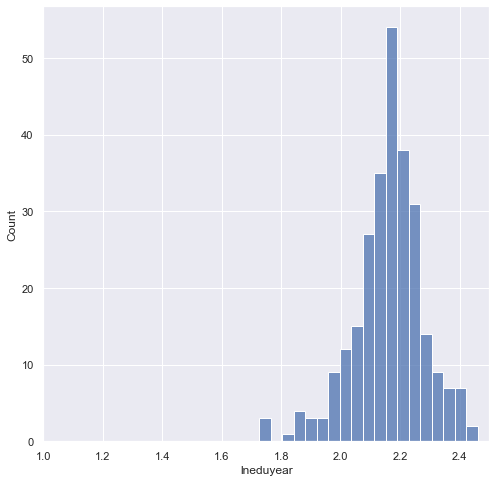

In [44]:
plot_distribution(data, "lneduyear")
data["lneduyear"].mean()

## 4.2. Keju and Distance to the Printing Ingredients


In order to convincingly pursue the identification strategy outlined above, it is necessary to establish an effect of distance to printing ingredients on jinshi density and to argue that the distance is exogenous to any unobserved factor affecting both jinshi density and contemporary human capital. As argued before one could easily construct reasonable patterns of unobservables that both cause jinshi density and contemporary human capital rendering a naive regression of comtemporary human capital on keju as biased.

The first requirement for IV to be valid holds, as it is clearly observable that distance to printing ingredients has an effect on jinshi density. The instrument is hence relevant. For the second requirement, Chen argues that the geographic distribution of pine and bamboo forests is random in nature and hence not correlated with any other unobserved variables (exogenous). The exogeneity assumption of the instrumental variable also holds. 

The importance of pine and bamboo for printing and accordingly a prefecture’s success in the civil exam is examed as follows. 


In [45]:
file_path = '/Users/mengxi/Documents/GitHub/ose-data-science-course-project-Mengxi-20/files/Abb_2.txt'
with open(file_path) as file_abb_1:
    abb2 = file_abb_1.read()
print(abb2)

lnprint         Printed books (logged)
pcenter         Printing centre
bprvdist        Shortest river distance to pine/bamboo (km, logged)
rvrdist         Shortest distance to major navigable rivers (km, logged)


In [46]:
# table 4 
# final version
provid = pd.Categorical(data.provid)

data['provid'] = provid
data = data.set_index(['provid','year'])

exog_vars = ['lnprint']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_1 = mod.fit()


exog_vars = ['lnprint','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_2 = mod.fit(cov_type = 'clustered',cluster_effects=True)


exog_vars = ['bprvdist']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.pcenter,exog,entity_effects=True)
res_fe_3 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.pcenter,exog,entity_effects=True)
res_fe_4 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnprint,exog,entity_effects=True)
res_fe_5 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnprint,exog,entity_effects=True)
res_fe_6 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_7 = mod.fit(cov_type = 'clustered',cluster_effects=True)

exog_vars = ['bprvdist','lnnightlight','lncoastdist','tri']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lnjinshipop,exog,entity_effects=True)
res_fe_8 = mod.fit(cov_type = 'clustered',cluster_effects=True)

print(compare({"jinshi density(logged)": res_fe_1, "jinshi density(logged)": res_fe_2, "printing center": res_fe_3, "printing center": res_fe_4}, stars = True, precision = "std_errors"))

print(compare({"jinshi density(logged)": res_fe_1, "jinshi density(logged)": res_fe_2, "printing center": res_fe_3, "printing center": res_fe_4, "printed books(logged)": res_fe_5, "printed books(logged)": res_fe_6, "jinshi density(logged)": res_fe_7, "jinshi density(logged)": res_fe_8}, stars = True, precision = "std_errors"))




/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                       Model Comparison                       
                        jinshi density(logged) printing center
--------------------------------------------------------------
Dep. Variable                      lnjinshipop         pcenter
Estimator                             PanelOLS        PanelOLS
No. Observations                           274             274
Cov. Est.                            Clustered       Clustered
R-squared                               0.2876          0.0795
R-Squared (Within)                      0.0000          0.0000
R-Squared (Between)                     0.3173          0.1994
R-Squared (Overall)                     0.2650          0.0795
F-statistic                             24.429          5.2253
P-value (F-stat)                        0.0000          0.0005
=====================            =============    ============
const                                   0.1857         -0.5395
                                      (0.8450)        (

/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/linearmodels/panel/results.py:1022: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  1,


As for exclusion restrictions, little evidence shows that pine and bamboo were intentionally planted for the purpose of commercial printing (Elvin, 2004). Even the most successful wood merchants in Huizhou prefecture of Anhui Province preferred to lumber trees from primordial forests rather than planting on their own (Li, 2000). The locations of pine and bamboo forests are therefore uncorrelated with other omitted variables, — most notably economic prosperity (including population density and urbanisation rate of a prefecture), which may be correlated with years of schooling today. 

Last but not least, Chen et. al. (2020) is confident that the IV does not have a direct effect on the contemporary development of the publishing industry and possibly economic prosperity as in the case of Europe, because the traditional Chinese woodblock printing was gradually replaced by the new printing technology in the late 20th century, which means that pine and bamboo as raw materials of printing technology stepped off the history stage.


这里还要改
In fact, by regressing our instrument on jinshi density but dividing it into 50-year chunks (see the coefficients in Figure 4), we do find that the average distance to pine and bamboo forests is significantly and positively correlated with jinshi density between the early 15th and the mid-19th centuries (c. 1451–1840), but becomes insignificant in the post-1850 period with the advent of the new printing technology.


So, distance to printing ingredients only affects comtemporary human capital through affecting jinshi density.


Z only affect the outcome Y through affecting X

## 4.3. Measuring the Impact of Keju on Contemporary Human Capital Outcomes

### 4.3.1. Baseline OLS estimates


By plotting correlation between jinshi density and years of schooling in 2010 in the following figure, it is obvious that there is a strong positive relationship between a prefecture’s success in the civil exam and contemporary human capital outcomes. 


/Users/mxx/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


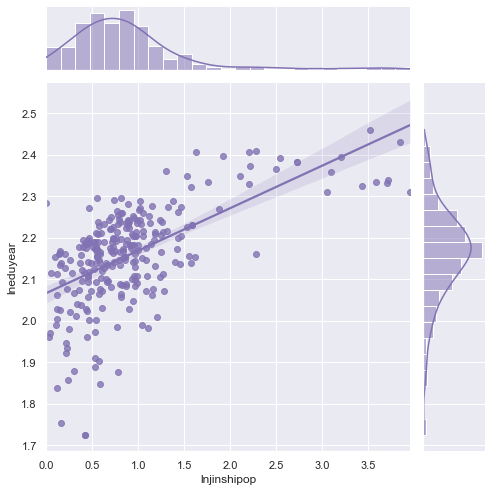

In [47]:
sns.set(style="darkgrid")
g = sns.jointplot("lnjinshipop", "lneduyear", 
                   data=data, kind="reg",
                   color="m", height=7)

In [48]:
result = smf.ols('lneduyear ~ lnjinshipop', data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              lneduyear   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           6.01e-29
Time:                        13:48:31   Log-Likelihood:                 260.03
No. Observations:                 274   AIC:                            -516.1
Df Residuals:                     272   BIC:                            -508.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0667      0.009    220.713      

In [49]:
provid = pd.Categorical(data.provid)
data = data.set_index(['provid','year'])
data['provid'] = provid
exog_vars = ['lnjinshipop']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lneduyear,exog,entity_effects=True)
res = mod.fit()
print(res)

AttributeError: 'DataFrame' object has no attribute 'provid'

In [ ]:
result = smf.ols('lneduyear ~ lnjinshipop + lnnightlight + lncoastdist + tri + suitability + lnpopdensity + urbanrates', data = data).fit()
print(result.summary())

In [ ]:
provid = pd.Categorical(data.provid)
data['provid'] = provid
exog_vars = ['lnjinshipop','lnnightlight','lncoastdist','tri','suitability','lnpopdensity','urbanrates']
exog = sm.add_constant(data[exog_vars])
mod = PanelOLS(data.lneduyear,exog,entity_effects=True)
res = mod.fit(cov_type = 'clustered',cluster_effects=True)
print(res)

### 4.3.2. TSLS

---
# 5. Extention
---

---
# 6. Conclusion
---

---
# 7. Reference
---

* **Chen, T., Kung, J. K. S., & Ma, C. (2020)**. Long Live Keju! The Persistent Effects of China’s Civil Examination System. *The Economic Journal*, 130(631), 2030–2064.

